\begin{center} by Ibis Prevedello (1794539) \end{center}

# Introduction
The goal of this project is to train a classifier using LeNet architecture in order to classify different categories of boats navigating in the City of Venice (Italy).

The dataset that is being used here is the [MarDCT](http://www.dis.uniroma1.it/~labrococo/MAR/index.htm) from the Sapienza University of Rome.

The training dataset contains 4.774 images and the test dataset contains 1.969 from 24 different categories.

# Development
Below the development of the project is detailed, commenting each of the functions and steps given to achieve the desired goals for the project.

## Import necessary libraries for the project
In the following block is listed all the necessary libraries for the project, the seed for the random numbers and the path for the folder containing.

In [1]:
# Difine libraries
from tqdm import tqdm
from textwrap import wrap
from sklearn.utils import shuffle
from sklearn import preprocessing

import os, os.path
import random
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2

# Visualizations will be shown in the notebook.
%matplotlib inline

# Set seed for random numbers
random.seed(1)

# Define folder where the log files are located
train_folder = 'training/'
test_folder = 'test/'

## Load data
Because the dataset is too big and my computer cannot handle to keep in memory the whole dataset, the two dictionaries below are used to select which classes to be used from the training and test dataset.

In [2]:
# Dictionary with classes
dict_train = {
    #'Alilaguna':0,
    #'Ambulanza':1,
    #'Barchino':2,
    #'Cacciapesca':3,
    #'Caorlina':4,
    #'Gondola':5,
    #'Lanciafino10m':6,
    'Lanciafino10mBianca':7,
    'Lanciafino10mMarrone':8,
    #'Lanciamaggioredi10mBianca':9,
    #'Lanciamaggioredi10mMarrone':10,
    'Motobarca':11,
    #'Motopontonerettangolare':12,
    #'MotoscafoACTV':13,
    'Mototopo':14,
    'Patanella':15,
    #'Polizia':16,
    #'Raccoltarifiuti':17,
    #'Sandoloaremi':18,
    #'Sanpierota':19,
    #'Topa':20,
    'VaporettoACTV':21,
    #'VigilidelFuoco':22,
    'Water':23
    #'SnapshotBarcaParziale':24,
    #'SnapshotBarcaMultipla':25
}

dict_test = {
    #'Alilaguna':0,
    #'Ambulanza':1,
    #'Barchino':2,
    #'Cacciapesca':3,
    #'Caorlina':4,
    #'Gondola':5,
    #'Lancia: fino 10 m':6,
    'Lancia: fino 10 m Bianca':7,
    'Lancia: fino 10 m Marrone':8,
    #'Lancia: maggiore di 10 m Bianca':9,
    #'Lancia: maggiore di 10 m Marrone':10,
    'Motobarca':11,
    #'Motopontone rettangolare':12,
    #'Motoscafo ACTV':13,
    'Mototopo':14,
    #'Mototopo corto':14,
    'Patanella':15,
    #'Polizia':16,
    #'Raccolta rifiuti':17,
    #'Sandolo a remi':18,
    #'Sanpierota':19,
    #'Topa':20,
    'Vaporetto ACTV':21,
    #'Vigili del Fuoco':22,
    'Snapshot Acqua':23
    #'Snapshot Barca Parziale':24,
    #'Snapshot Barca Multipla':25
}

# Invert dictionary keys and values to be used in the plots
dict_test_inverse = dict((v,k) for k, v in dict_test.items())

In [3]:
# Save data to file
def save_data(X, y, name):
    with open(name + '.p', 'wb') as f:
        pickle.dump({'features':X, 'labels':y}, f, pickle.HIGHEST_PROTOCOL)

# Load data from file
def load_data(name):
    with open(name + '.p', 'rb') as f:
        return pickle.load(f)

In [4]:
# List for files
X_train = list()
y_train = list()
    
if os.path.isfile('training.p'):
    print('Training file found!')
    with open('training.p', mode='rb') as f:
        train = pickle.load(f)
    X_train, y_train = train['features'], train['labels']
else:
    print('Training file not found!')

    for i in os.listdir(train_folder):
        subfolder = train_folder + i + "/"
        if os.path.isdir(subfolder):
            files = os.listdir(subfolder)

            # If file is in classes to be classified
            if i in dict_train:
                pbar = tqdm(range(len(files)))
                pbar.set_description('Processing \'' + i + '\'')

                # For each file
                for j in pbar:
                    f = files[j]
                    image = cv2.resize(plt.imread(subfolder + f), (50,50), interpolation=cv2.INTER_LINEAR)
                    #image = normalize(image)
                    X_train.append(image)
                    y_train.append(dict_train[i])
    
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    # Save dictionary
    save_data(X_train, y_train, 'training')
    print('\nTraining saved to file!')

Training file found!


In [5]:
# List for files
X_test = list()
y_test = list()
    
# load test files
if os.path.isfile('test.p'):
    print('Test file found!')
    with open('test.p', mode='rb') as f:
        test = pickle.load(f)
    X_test, y_test = test['features'], test['labels']
else:
    print('Test file not found!')

    test_label_dictionary = {}
    for l in open(test_folder + 'ground_truth.txt', 'r'):
        file, name = l.strip().split(';')
        if name in dict_test:
            test_label_dictionary[file] = name

    pbar = tqdm(range(len(test_label_dictionary)))
    pbar.set_description('Processing test data')
    
    keys = list(test_label_dictionary)

    for f in pbar:
        image = cv2.resize(plt.imread(test_folder + keys[f]), (50,50), interpolation=cv2.INTER_LINEAR)
        X_test.append(image)
        y_test.append(dict_test[test_label_dictionary[keys[f]]])

    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    # Save dictionary
    save_data(X_test, y_test, 'test')
    print('\nTest saved to file!')

Test file found!


In [6]:
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_test[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(dict_train)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 4067
Number of testing examples = 1494
Image data shape = (50, 50, 3)
Number of classes = 7


# Visualize data

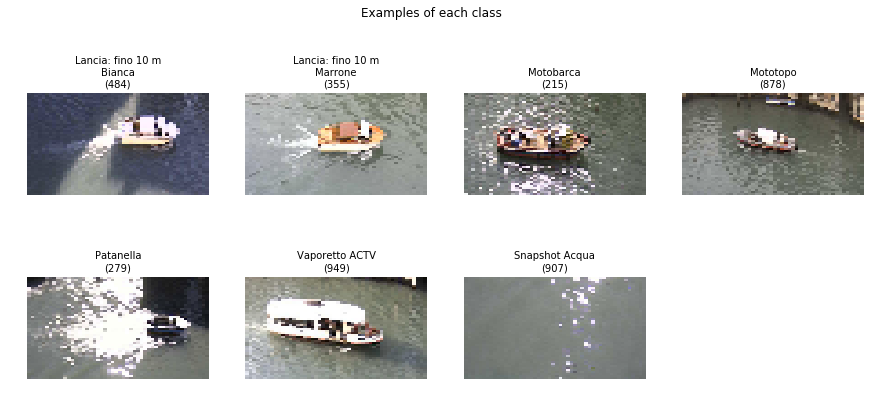

In [7]:
def visualize_data(X, y):
    rows = 4
    samples = list()

    fig = plt.figure(facecolor="white")
    fig.set_size_inches(15, 12)
    fig.subplots_adjust(hspace=.8)

    position = 0
    for i in dict_train:
        position += 1
        index_dic = dict_train[i]
        count = sum(y == index_dic)
        index = random.choice(np.where(y == index_dic)[0])

        ax=fig.add_subplot(rows,rows,position, aspect='equal')        
        ax.imshow(X[index])
        ax.axis('off')
        ax.set_title("\n".join(wrap(dict_test_inverse[index_dic],20)) + "\n(" + str(count) + ")", fontsize = 10)
        ax.axis('tight')
    plt.suptitle('Examples of each class')
    
visualize_data(X_train, y_train)

In [8]:
## Plot number of each examples in the test data
#import collections

def plot_sample_class_distributions(samples, title):
    
    label_count = list()
    for i in dict_train:
        index_dic = dict_train[i]
        label_count.append((samples == index_dic).sum())

    indexes = np.arange(len(dict_test))

    fig = plt.figure(facecolor="white")
    fig.set_size_inches(12, int(len(dict_train)/2))
    ax = fig.add_subplot(111)
    
    ax.barh(indexes, label_count, alpha=0.75)
    #ax.axis([0, np.max(label_count)+10, -0.5, n_classes-0.4])
    ax.set_yticks(indexes)
    ax.set_yticklabels(dict_test, fontsize = 10)

    ax.set_ylabel('Boat Types', fontsize = 10)
    ax.set_xlabel('Number of Samples', fontsize = 10)
    ax.set_title(title, fontsize = 14)

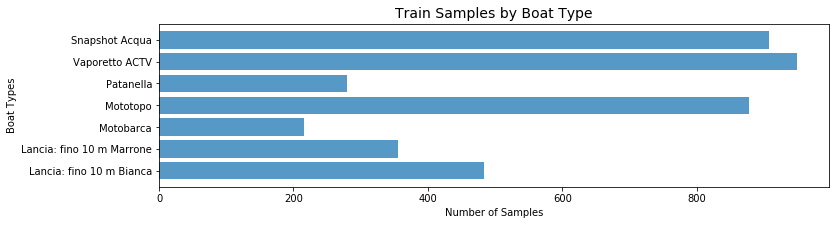

In [9]:
plot_sample_class_distributions(samples=y_train, title='Train Samples by Boat Type')

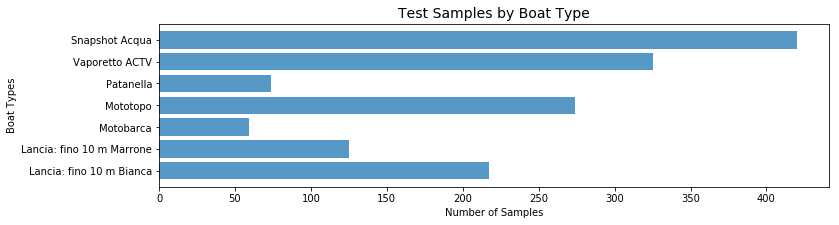

In [10]:
plot_sample_class_distributions(samples=y_test, title='Test Samples by Boat Type')

# Data Augmentation

In [11]:
def flip_image(img, flip = False):
    if random.randint(0, 1) or flip:
        return cv2.flip(img, 1)
    else:
        return img

def brightness_image(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hsv[:,:,2] = hsv[:,:,2] * (1 + np.random.uniform(-0.6, 0.0))
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def rotate_image(img):
    rows,cols,channel = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2), random.uniform(-int(rows/5), int(rows/5)), 1)
    return cv2.warpAffine(img,M,(cols,rows), borderMode=1)

def translate_image(img):
    rows, cols, chs = img.shape
    horz_range=int(cols/10)
    vert_range=int(rows/10)
    tx = np.random.randint(-horz_range, horz_range+1)
    ty = np.random.randint(-vert_range, vert_range+1)
    tr_M = np.float32([[1,0,tx], [0,1,ty]])
    img = cv2.warpAffine(img, tr_M, (cols,rows), borderMode=1)
    return img

def shadow_image(img):
    rows, cols, chs = img.shape
    
    # Generate a separate buffer
    shadows = img.copy()

    randomUp = int(random.random() * cols)
    randomDown = int(random.random() * cols)
    
    if random.randint(0, 1):
        poly = [[randomUp,0],[cols,0],[cols,rows], [randomDown,rows]]
    else:
        poly = [[randomUp,0],[0,0],[0,rows], [randomDown,0]]
        
    cv2.fillPoly(shadows, np.array([poly]), -1)

    alpha = np.random.uniform(0.6, 0.9)
    return cv2.addWeighted(shadows, alpha, img, 1-alpha,0,img)

# Function to plot example data
def plot_example(image1, image2, title):
    fig = plt.figure(facecolor="white")
    fig.set_size_inches(5, 5)
    ax=fig.add_subplot(221)        
    ax.imshow(image1)
    ax.axis('off')
    ax.axis('tight')
    ax=fig.add_subplot(222) 
    ax.imshow(image2)
    ax.axis('off')
    ax.axis('tight')
    plt.suptitle(title)
    
img = np.copy(random.choice(X_train))

## Data augmentation examples

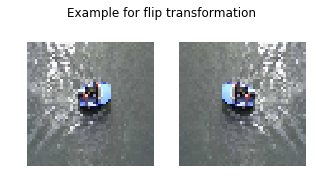

In [12]:
plot_example(img, flip_image(img, True), 'Example for flip transformation')

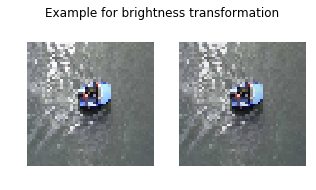

In [13]:
plot_example(img, brightness_image(img), 'Example for brightness transformation')

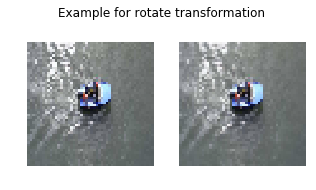

In [14]:
plot_example(img, rotate_image(img), 'Example for rotate transformation')

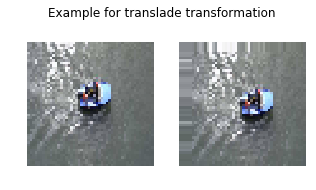

In [15]:
plot_example(img, translate_image(img), 'Example for translade transformation')

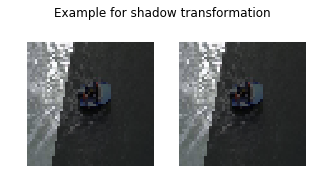

In [16]:
plot_example(img, shadow_image(img), 'Example for shadow transformation')

In [17]:
def augment_image(X, y):
    
    # Class with more samples
    n_max = 0
    for i in dict_train:
        index_dic = dict_train[i]
        n_max = max(n_max, (y == index_dic).sum())
    
    # Generate new random images
    for i in dict_train:
        index_dic = dict_train[i]
        n_actual = (y == index_dic).sum()
        n_class = n_max - n_actual
        
        if n_class != 0:
            index = [j for j,v in enumerate(y == index_dic) if v]

            indexes = [random.choice(index) for _ in range(n_class)]

            pbar = tqdm(range(n_class))
            pbar.set_description('Processing \'' + dict_test_inverse[index_dic] + '\'')

            for j in pbar:

                img = X[indexes[j]]

                img = flip_image(img)
                img = brightness_image(img)
                img = rotate_image(img)
                img = translate_image(img)
                img = shadow_image(img)

                X = np.vstack([X, np.reshape(img, [1, 50, 50, 3])])
                y = np.append(y, y[indexes[j]])
            
    return X, y

# load training files
if os.path.isfile('training_augmented.p'):
    print('Training augmented file found!')
    with open('training_augmented.p', mode='rb') as f:
        train = pickle.load(f)
    X_train, y_train = train['features'], train['labels']
else:
    X_train, y_train = augment_image(X_train, y_train)
    
    # Save augmented data
    save_data(X_train, y_train, 'training_augmented')
    print('Training augmented saved to file!')

Training augmented file found!


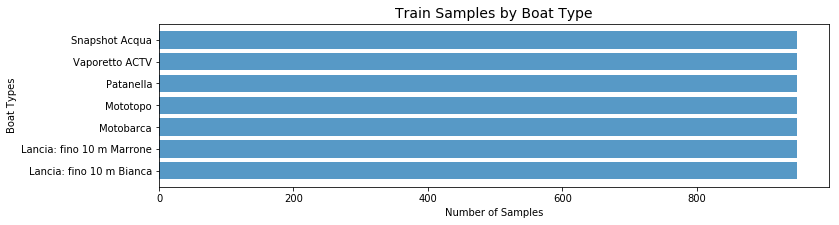

In [18]:
plot_sample_class_distributions(samples=y_train, title='Train Samples by Boat Type')

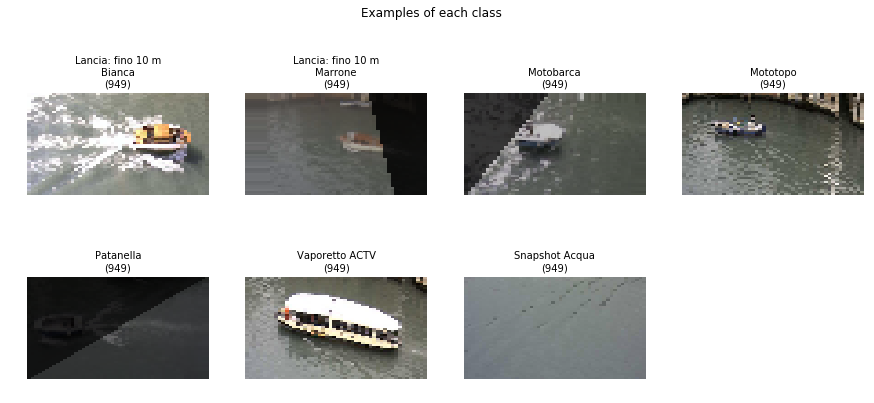

In [19]:
visualize_data(X_train, y_train)

# Preprocess data

In [20]:
# Normalize the data features to the variable X_normalized
def normalize(data):
    a = -0.5
    b = 0.5
    xmin = np.min(data)
    xmax = np.max(data)

    return a + (data - xmin) * (b - a)/(xmax - xmin)

# One Hot encode the labels to the variable y_one_hot
label_binarizer = preprocessing.LabelBinarizer()
label_binarizer.fit(y_train)

# Shuffle the data
X_train, y_train = shuffle(X_train, y_train)

# Normalize data
#X_train = image = normalize(X_train)

# Encode labels
y_train = label_binarizer.transform(y_train)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

# Normalize data
#X_test = image = normalize(X_test)

# Encode labels
label_binarizer.fit(y_test)
y_test = label_binarizer.transform(y_test)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

# Architecture

(-0.5, 530.5, 1400.5, -0.5)

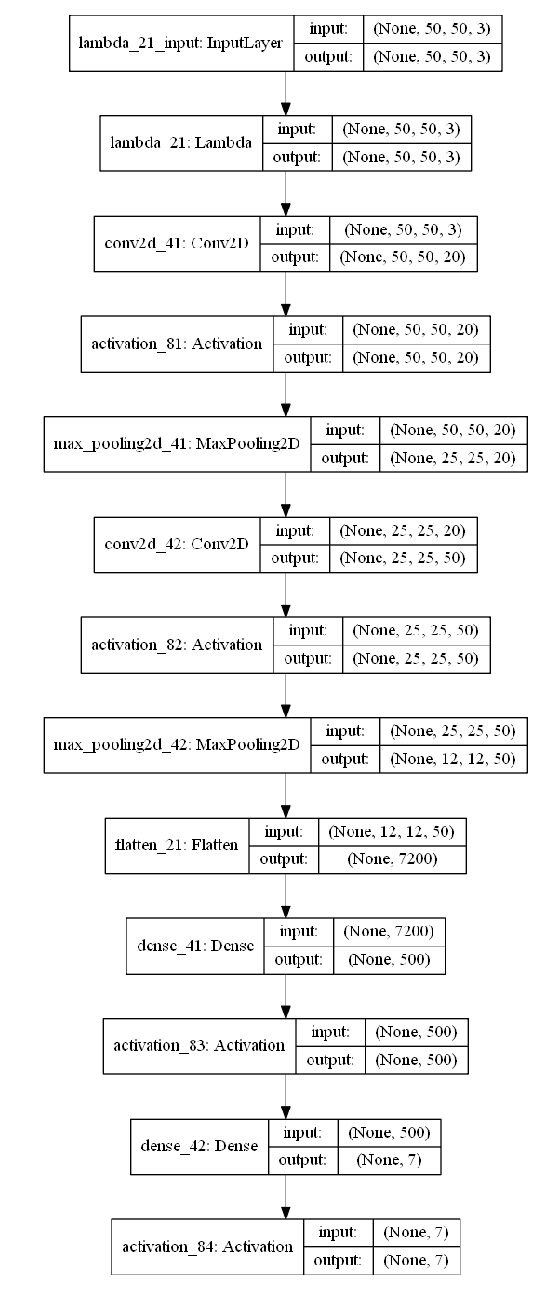

In [62]:
from keras.models import Sequential
from keras.layers import Lambda, Activation, Conv2D
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras.utils.vis_utils import plot_model

height, width, depth = X_train[0].shape

def lenet(width, height, depth, classes, weightsPath=None):
    model = Sequential()
    
    model.add(Lambda(lambda x: x/127.5 - 1.,
        input_shape=(width,height,depth),
        output_shape=(width,height,depth)))

    # first set of CONV => RELU => POOL
    model.add(Conv2D(20, (5, 5), padding="same", input_shape=(depth, height, width)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))    

    # second set of CONV => RELU => POOL
    model.add(Conv2D(50, (5, 5), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # set of FC => RELU layers
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation("relu"))

    # softmax classifier
    model.add(Dense(classes))
    model.add(Activation("softmax"))
    
    # if a weights path is supplied (inicating that the model was
    # pre-trained), then load the weights
    if weightsPath is not None:
        model.load_weights(weightsPath)

    plot_model(model, show_shapes=True, to_file='model.png')
        
    # return the constructed network architecture
    return model

model = lenet(width, height, depth, n_classes, weightsPath=None)

# Plot model
img=plt.imread('model.png')
fig = plt.figure(facecolor="white")
fig.set_size_inches(531/60, 1401/60)
ax=fig.add_subplot(111)        
ax.imshow(img)
ax.axis('off')
ax.axis('tight')

In [32]:
# Initialize the optimizer and model
print("Compiling model...")
opt = optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train model if there is no pre-existing one
history = model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=2)

Compiling model...
Epoch 1/10
 - 47s - loss: 0.9715 - acc: 0.6354
Epoch 2/10
 - 47s - loss: 0.6454 - acc: 0.7513
Epoch 3/10
 - 47s - loss: 0.5057 - acc: 0.8020
Epoch 4/10
 - 59s - loss: 0.4112 - acc: 0.8425
Epoch 5/10
 - 52s - loss: 0.3223 - acc: 0.8796
Epoch 6/10
 - 47s - loss: 0.2483 - acc: 0.9059
Epoch 7/10
 - 46s - loss: 0.1977 - acc: 0.9273
Epoch 8/10
 - 46s - loss: 0.2145 - acc: 0.9277
Epoch 9/10
 - 46s - loss: 0.1392 - acc: 0.9506
Epoch 10/10
 - 46s - loss: 0.1081 - acc: 0.9609


In [33]:
# show the accuracy on the testing set
(loss, accuracy) = model.evaluate(X_test, y_test, batch_size=100, verbose=2)
print("Test Accuracy:\t{:.2f}%".format(accuracy * 100))

#model.save_weights(args["weights"], overwrite=True)

Test Accuracy:	85.61%


In [40]:
def plot_iteration_graph(data, title, xlabel, ylabel):
    fig = plt.figure(facecolor="white")
    fig.set_size_inches(9, 4)
    ax = fig.add_subplot(111)
    
    dim = np.arange(1,len(data)+1,1);
    ax.plot(dim,data)
    ax.axis([1, len(data), min(data) - 0.05, max(data) + 0.05])

    ax.set_ylabel(ylabel, fontsize = 10)
    ax.set_xlabel(xlabel, fontsize = 10)
    ax.set_title(title, fontsize = 14)

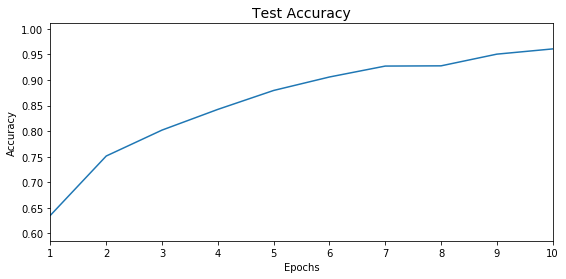

In [41]:
plot_iteration_graph(history.history['acc'], 'Train Accuracy', 'Epochs', 'Accuracy')

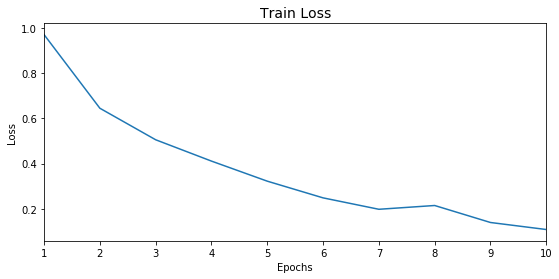

In [42]:
plot_iteration_graph(history.history['loss'], 'Train Loss', 'Epochs', 'Loss')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Convolution2D, Flatten, Activation, MaxPooling2D, Dropout, Lambda, RELU

row, col, ch = X_train[0].shape

def model():
    model = Sequential()

    model.add(Lambda(lambda x: x/127.5 - 1.,
            input_shape=(col,row,ch),
            output_shape=(col,row,ch)))
    
    model.add(Convolution2D(100, 8, 1, subsample=(4, 4), border_mode="same"))
    model.add(RELU())
    
    model.add(Convolution2D(32, 5, 5, subsample=(2, 2), border_mode="same"))
    model.add(ELU())
    
    model.add(Convolution2D(64, 5, 5, subsample=(2, 2), border_mode="same"))
    
    model.add(Flatten())
    model.add(Dropout(.2))
    model.add(ELU())
    model.add(Dense(512))
    model.add(Dropout(.5))
    model.add(ELU())
    model.add(Dense(1))
    
    plot(model, show_shapes=True, to_file='images/model.png')
    
    return model

In [ ]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Input image size
image_size = X_train[0].shape[0]
num_channels = X_train[0].shape[2]

# Filter size
kernel_size = 5
depth1 = 100
depth2 = 500
depth3 = 1000
depth4 = 200

graph = tf.Graph()
with graph.as_default():
    features = tf.placeholder(tf.float32, [None, image_size, image_size, num_channels])
    labels = tf.placeholder(tf.float32, [None, n_classes])
    keep_prob = tf.placeholder(tf.float32)
    beta = tf.placeholder(tf.float32)
    learning_rate = tf.placeholder(tf.float32)
    
    weights = {
        'layer1': tf.Variable(tf.truncated_normal(shape = [kernel_size, kernel_size, num_channels, depth1], stddev = 0.1)),
        'layer2': tf.Variable(tf.truncated_normal(shape = [kernel_size, kernel_size, depth1, depth2], stddev = 0.1)),
        'layer3': tf.Variable(tf.truncated_normal(shape = [image_size // 4 * image_size // 4 * depth2, depth3], stddev = 0.1)),
        'layer4': tf.Variable(tf.truncated_normal(shape = [depth3, depth4], stddev = 0.1)),
        'layer5': tf.Variable(tf.truncated_normal(shape = [depth4, n_classes], stddev = 0.1))
    } 

    biases = {
        'layer1': tf.Variable(tf.zeros([depth1])),
        'layer2': tf.Variable(tf.zeros([depth2])),
        'layer3': tf.Variable(tf.zeros([depth3])),
        'layer4': tf.Variable(tf.zeros([depth4])),
        'layer5': tf.Variable(tf.zeros([n_classes]))
    }

    # Layer 1: Input: 32 x 32 x 3 - Output: 32 x 32 x 32
    conv = tf.nn.conv2d(features, weights['layer1'], strides = [1, 1, 1, 1], padding = 'SAME') + biases['layer1'] # (32, 32, 3) (32, 32, 32)
    hidden = tf.nn.relu(conv)
    pool = tf.nn.max_pool(hidden, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME') # (32, 32, 32) (16, 16, 32)
    
    # Layer 2: Input: 16 x 16 x 32 - Output: 8 x 8 x 64
    conv = tf.nn.conv2d(pool, weights['layer2'], strides = [1, 1, 1, 1], padding = 'SAME') + biases['layer2'] # (16, 16, 32) (16, 16, 64)
    hidden = tf.nn.relu(conv)
    pool = tf.nn.max_pool(hidden, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME') # (16, 16, 64) (8, 8, 64)
    reshape   = flatten(pool) # (8, 8, 64) (1, 1024)
    
    # Layer 3: Input: 1 x 1024 - Output: 1 x 1024
    fc1 = tf.matmul(reshape, weights['layer3']) + biases['layer3']
    fc1 = tf.nn.relu(fc1)
    
    # Layer 4: Input: 1 x 1024 - Output: 1 x 256
    fc2    = tf.matmul(fc1, weights['layer4']) + biases['layer4']
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5: Input: 1 x 256 - Output: 1 x 43  
    logits = tf.matmul(fc2, weights['layer5']) + biases['layer5']

    # Training Pipeline
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, labels)
    loss_operation  = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_operation = optimizer.minimize(loss_operation)
    
    # Probability
    prediction = tf.nn.softmax(logits)
    
    # Evaluation of top five probabilities
    top_five = tf.nn.top_k(prediction, 5)
    
    # Model Evaluation
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver()

In [ ]:
# Parameters
epochs = 25 # Maximum epoch number
batch_size = 64 # Batch size
train_data_size = X_train_normalized.shape[0] # Training data size

# Feed_dict
feed_dict_valid = {features: X_valid_normalized, labels: y_valid_encoded, keep_prob: 1.0}
feed_dict_test = {features: X_test_normalized, labels: y_test_encoded, keep_prob: 1.0}

# Log lists
test_acc = list()
test_loss = list()
valid_acc = list()

with tf.Session(graph = graph) as session:
    tf.global_variables_initializer().run()
    
    for epoch in range(1, epochs + 1):
        
        # Shuffle the indices for the trainning data
        ind = np.arange(0, train_data_size)
        np.random.shuffle(ind)
        X_train_shuffle = X_train_normalized[ind]
        y_train_shuffle = y_train_encoded[ind]
        
        for batch_ind in range(0, train_data_size, batch_size):
            batch_data = X_train_shuffle[batch_ind : (batch_ind + batch_size), :, :, :]
            batch_labels = y_train_shuffle[batch_ind : (batch_ind + batch_size), :]
            feed_dict_train = { features: batch_data, labels: batch_labels, keep_prob: 0.5, beta: 1e-6, learning_rate: 0.001 }
            _, l, acc = session.run([training_operation, loss_operation, accuracy], feed_dict = feed_dict_train)
            test_acc.append(acc)
            test_loss.append(l)
            
        valid_accuracy = accuracy.eval(feed_dict = feed_dict_valid)
        valid_acc.append(valid_accuracy)
        
        print("Epoch: %d\tloss: %f\tAccuracy: %f\tValidation accuracy: %f" %(epoch, l, acc,valid_accuracy))

        # If both accuracy better than 0.99, stop running
        if(valid_accuracy > 0.99 and acc > 0.99):
            break

    print("\nTest accuracy:\t%f" %accuracy.eval(feed_dict = feed_dict_test))

    saver.save(session, 'model')
    print("\nModel saved")

In [ ]:
def plot_iteration_graph(data, title, xlabel, ylabel):
    fig = plt.figure(facecolor="white")
    fig.set_size_inches(9, 4)
    ax = fig.add_subplot(111)

    ax.plot(data)
    ax.axis([0, len(data), min(data) - 0.05, max(data) + 0.05])

    ax.set_ylabel(ylabel, fontsize = 10)
    ax.set_xlabel(xlabel, fontsize = 10)
    ax.set_title(title, fontsize = 14)

In [ ]:
plot_iteration_graph(test_acc, 'Test Accuracy', 'Iterations', 'Accuracy')